# <font color="Turquoise"><b>Práctica 3: Segmentación de mercado</b></font>

Elaborado con el apoyo de:
Luis Fernando Becerra, BEDA Aprendizaje de Máquinas 2024-1S - 2025-1S
Andres Esteban Marin Manco, BEDA Aprendizaje de Máquinas 2025-1S

# <font color="LightPink"><b>Aplicación Clustering: Segmentación de mercado</b></font>

En esta parte de la práctica aplicaremos lo aprendido sobre técnicas de agrupamiento para realizar un **análisis de segmentación de mercado**.

Para ello, utilizaremos el archivo `customer.csv`. Este conjunto de datos ya fue **preprocesado previamente**, incluyendo:

- Eliminación de **valores nulos** y algunas **anomalías** detectadas.
- Conversión de **variables categóricas** a valores **enteros codificados**.

In [1]:
#Importamos las librerias
#Visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#
# Cargamos el archivo
df = pd.read_csv('../Datos/customer.csv')
print(
    f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.'
)

El dataset tiene 2236 filas y 29 columnas.


In [3]:
#Revisamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int64  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

In [4]:
#Revisamos los primeros 5 elementos
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Living_with,Children,Family_size,Is_parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,57,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,60,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,49,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,30,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,33,422,1,1,3,1


Para este proceso de segmentación de mercado, vamos a seguir los siguientes pasos:

1. **Normalización de los datos**  
   Es fundamental escalar las variables para que todas tengan el mismo peso en el proceso de agrupamiento.

2. **Revisión de la correlación entre variables**  
   Analizaremos si existen variables altamente correlacionadas, lo cual puede indicarnos que alguna dimensión podría ser eliminada sin pérdida de información relevante.

3. **Aplicación inicial de K-Means**  
   Utilizaremos el algoritmo `K-Means` como primer enfoque para realizar el análisis de los segmentos de mercado.


In [6]:
#Importamos
from sklearn.preprocessing import StandardScaler
#Normalizamos
scaler = StandardScaler()
#Seleccionamos las columnas numéricas
data = scaler.fit_transform(df)
data = pd.DataFrame(data, columns=df.columns)

In [7]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Living_with,Children,Family_size,Is_parent
0,-0.89438,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169
2,-0.89438,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362
3,-0.89438,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169
4,0.57070,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169


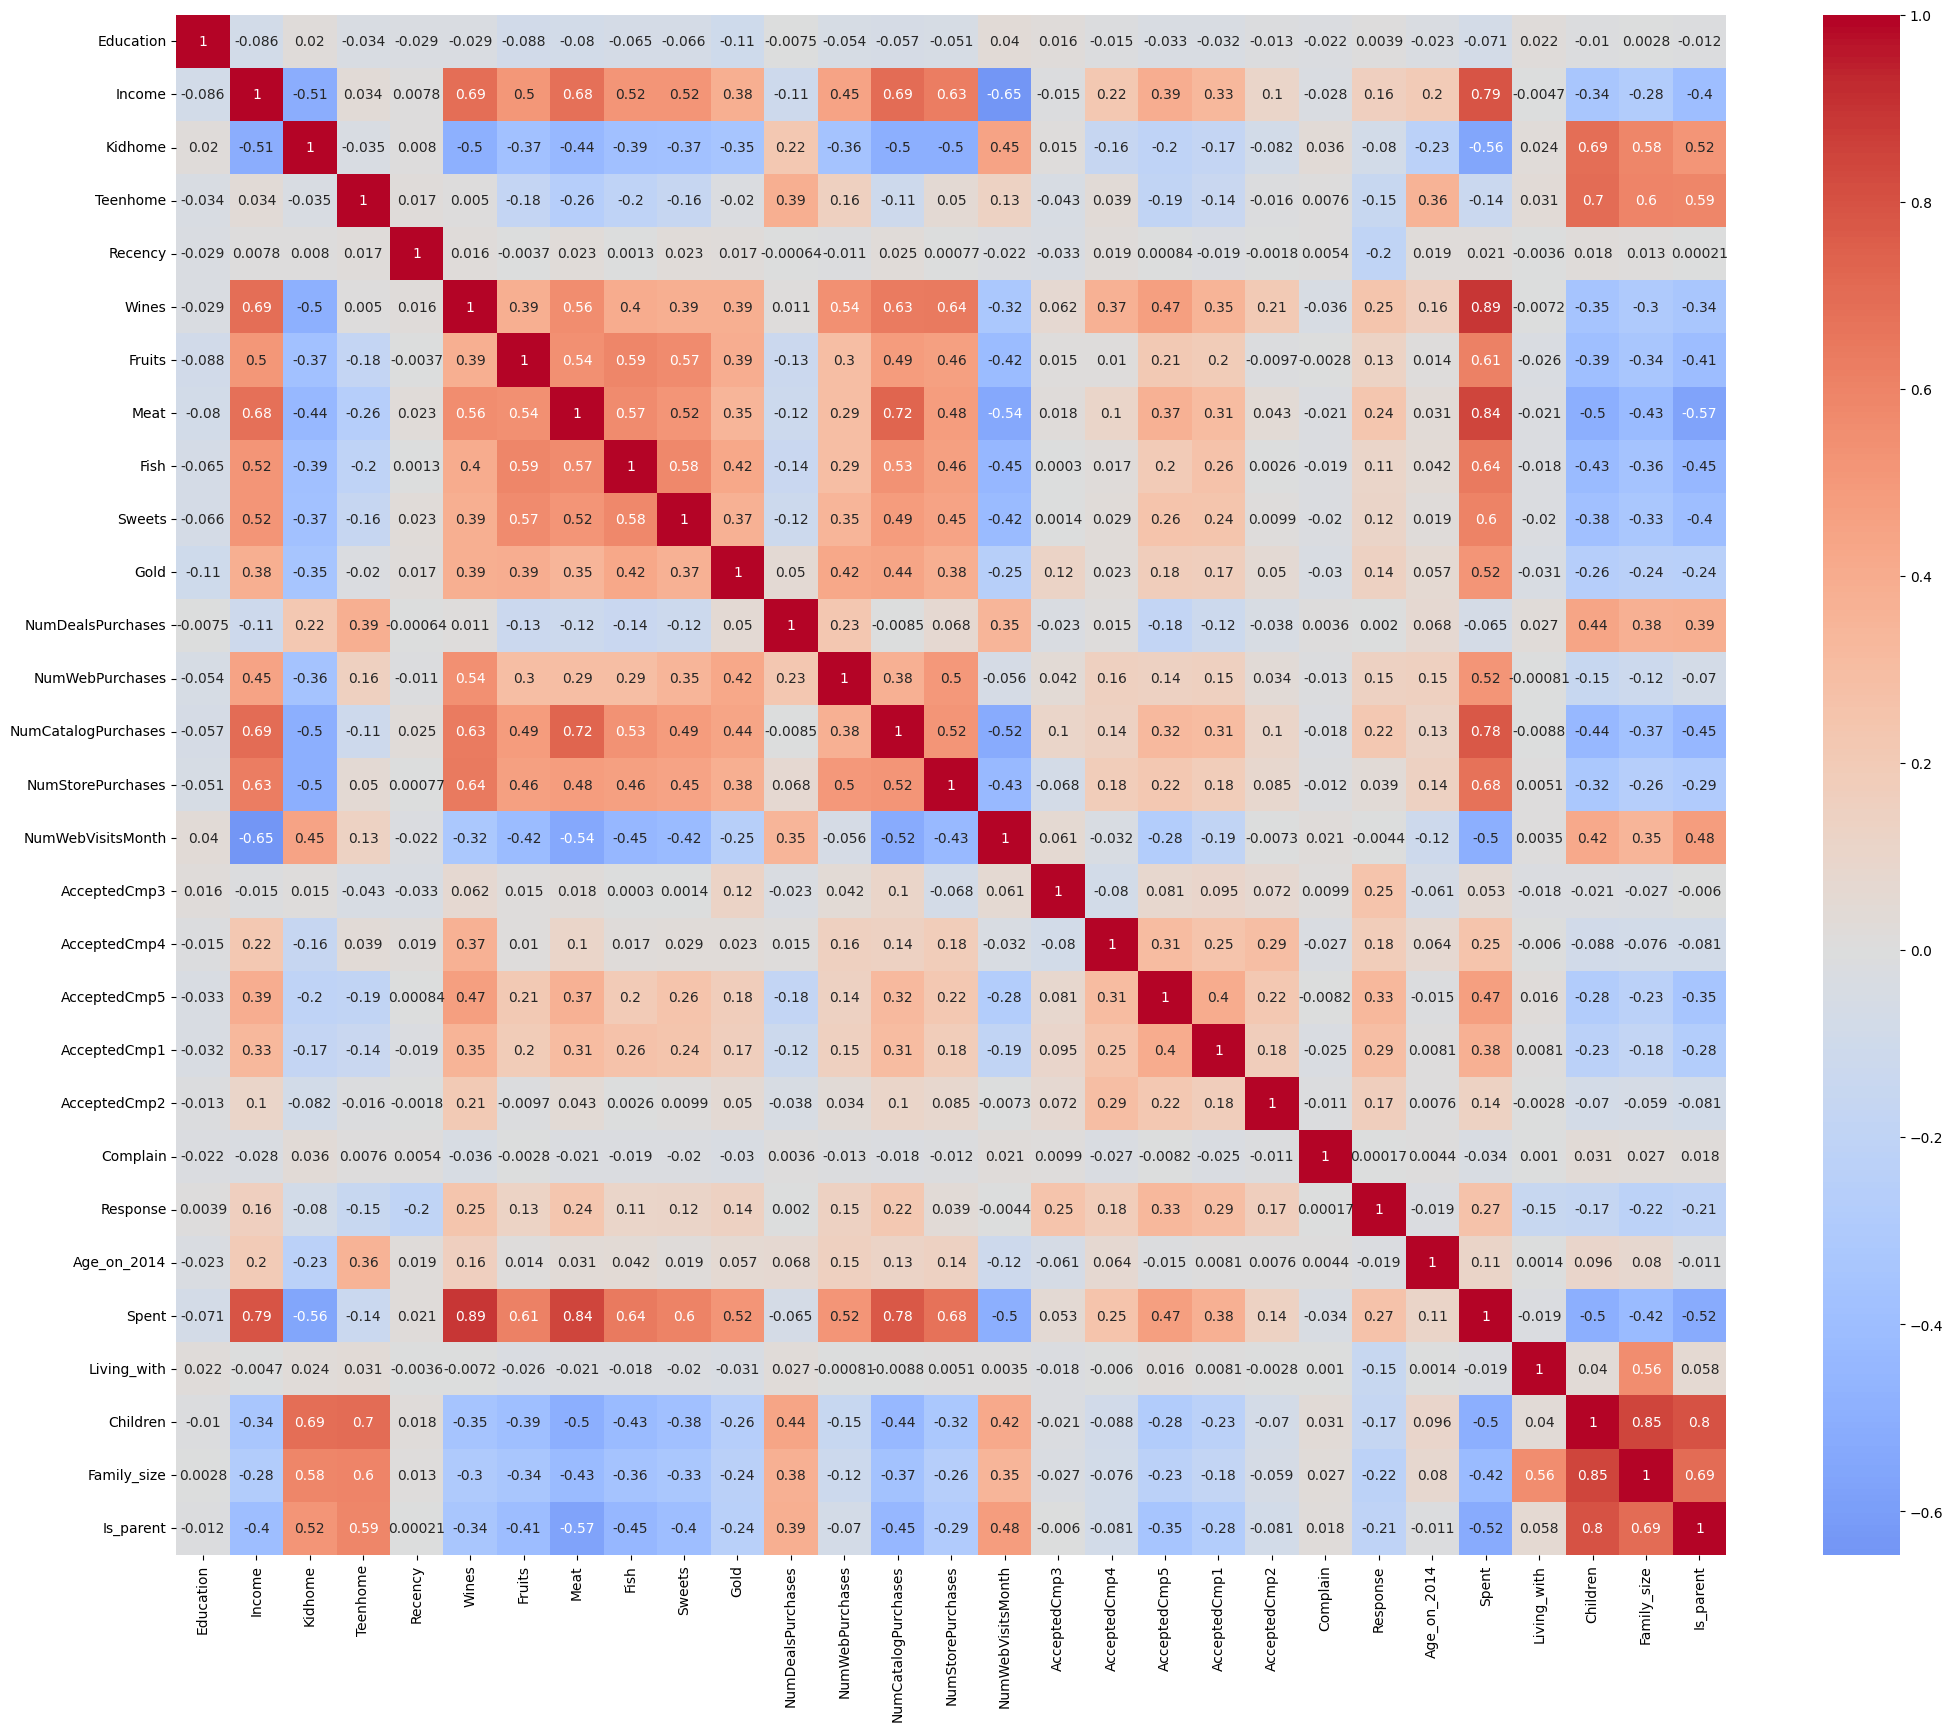

In [8]:
#Analizamos la correlacion de los datos con un mapa de calor
corrmax = data.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corrmax, annot=True, cmap = 'coolwarm', center=0)
plt.show()

# Kmeans

In [12]:
#Importar Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# arreglos para indices
inertias = []
db = []
silhouette = []


#clustering
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    db.append(davies_bouldin_score(data, kmeans.labels_))
    silhouette.append(silhouette_score(data, kmeans.labels_))

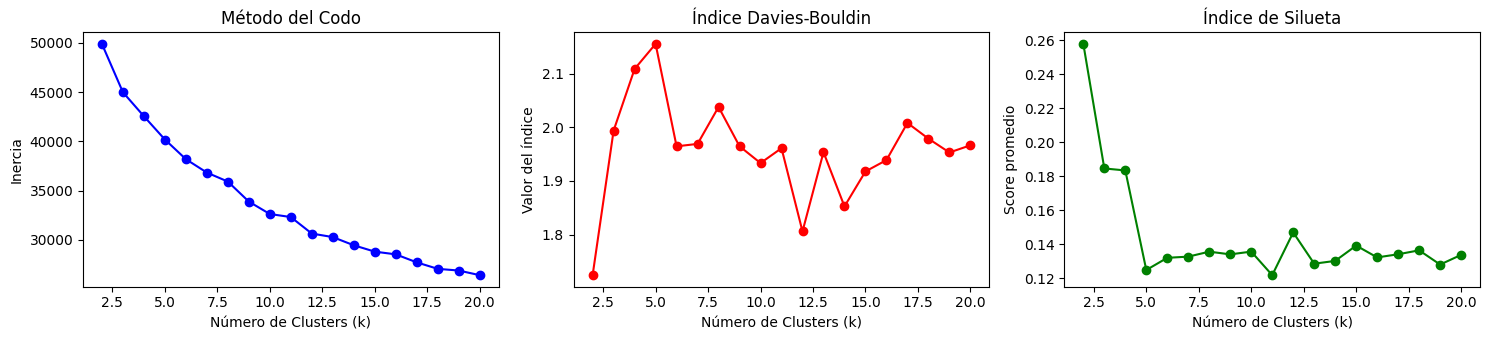

In [13]:
#Graficamos el resultado
plt.figure(figsize=(15, 3.5))

#Gráfico 1: Inercia
plt.subplot(1, 3, 1)
plt.plot(range(2, 21), inertias, 'b', marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')

#Gráfico 2: Índice Davies-Bouldin
plt.subplot(1, 3, 2)
plt.plot(range(2, 21), db, 'r', marker='o')
plt.title('Índice Davies-Bouldin')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Valor del índice')

#Gráfico 3: Silueta
plt.subplot(1, 3, 3)
plt.plot(range(2, 21), silhouette, 'g', marker='o')
plt.title('Índice de Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score promedio')

plt.tight_layout()
plt.show()

### <font color="LightPink"><b>Análisis de los índices de evaluación</b></font>

A partir de los resultados graficados, podemos hacer las siguientes observaciones:

1. **Método del Codo (Inercia)**  
   Se observa una reducción considerable de la inercia hasta `k = 4`, donde empieza a aplanarse la curva. Esto sugiere que `k = 4` podría ser una buena elección para el número de clusters.

2. **Índice Davies-Bouldin**  
   Este índice busca minimizarse. El valor más bajo se presenta en `k = 2`, seguido de `k = 9`. Sin embargo, presenta bastante variabilidad, lo que indica que no hay una separación de clusters clara para todos los valores de `k`.

3. **Índice de Silueta**  
   El valor más alto aparece en `k = 2`, lo que sugiere una buena separación y cohesión en ese caso. No obstante, los valores bajan rápidamente a medida que aumenta `k`, indicando una menor calidad de los agrupamientos para valores más altos.

### <b>Conclusión número de clusters:</b>  
Aunque el índice de silueta y Davies-Bouldin favorecen `k = 2`, el método del codo sugiere `k = 4`. La elección final de `k` dependerá del equilibrio entre interpretabilidad, granularidad deseada y validación adicional sobre el negocio o contexto de análisis.


In [14]:
#Seleccionamos numero de cluster y obtenemos el agrupamiento
kmeans = KMeans(n_clusters=2, init='random', n_init=30,)
kmeans.fit(data)

,n_clusters,2
,init,'random'
,n_init,30
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [15]:
#Agregamos la información de los clusters a los datos originales
df['Cluster'] = kmeans.labels_

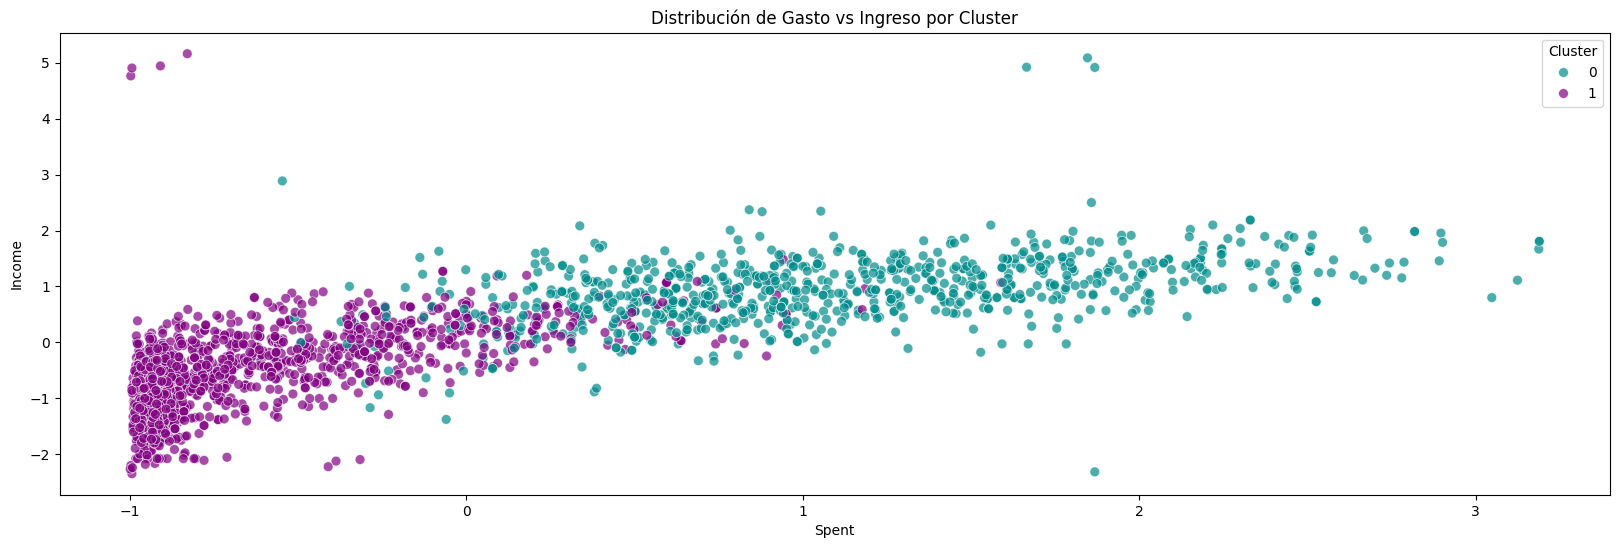

In [16]:
#Analizamos variables de interes
#Ej: como se comporta lo que gasta un cliente vs sus ingresos
plt.figure(figsize=(20, 6))
sns.scatterplot(
    data=df,
    x='Spent',
    y='Income',
    hue='Cluster',
    palette={0: 'darkcyan', 1: 'purple'},
    alpha=0.7,
    s=50

)
plt.title('Distribución de Gasto vs Ingreso por Cluster')
plt.legend(title='Cluster')
plt.show()

### <font color="LightPink"><b>Análisis del resultado de clustering</b></font>

El gráfico muestra el resultado de una segmentación en **dos grupos** (`0` y `1`) utilizando las variables `Spent` (gasto) e `Income` (ingreso).

- El **grupo 1** (color naranja) agrupa principalmente a los clientes con **bajo ingreso y bajo gasto**. Se observa una concentración clara en la parte inferior izquierda del gráfico.
- El **grupo 0** (color azul) contiene clientes con **mayor ingreso** y una **mayor capacidad de gasto**, distribuidos de forma más dispersa a lo largo del plano.

Esta segmentación sugiere que el algoritmo logró separar aceptablemnte a los clientes según su perfil económico.


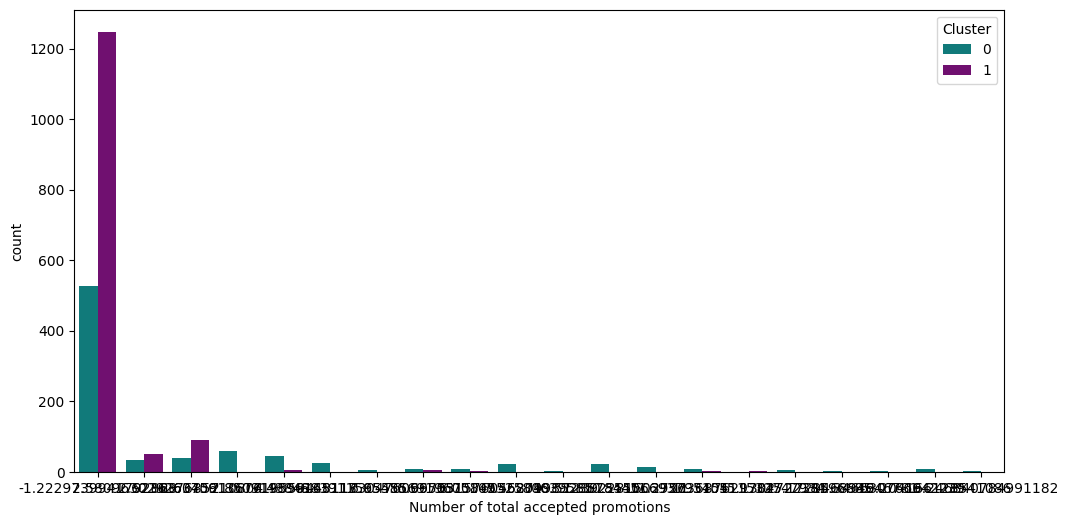

In [17]:
#Ej: cual es el nivel de aceptación de las promociones
df['Total_promos']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

plt.figure(figsize=(12,6))
sns.countplot(df, x = 'Total_promos', hue='Cluster', palette={0: 'darkcyan', 1: 'purple'})
plt.xlabel("Number of total accepted promotions")
plt.show()

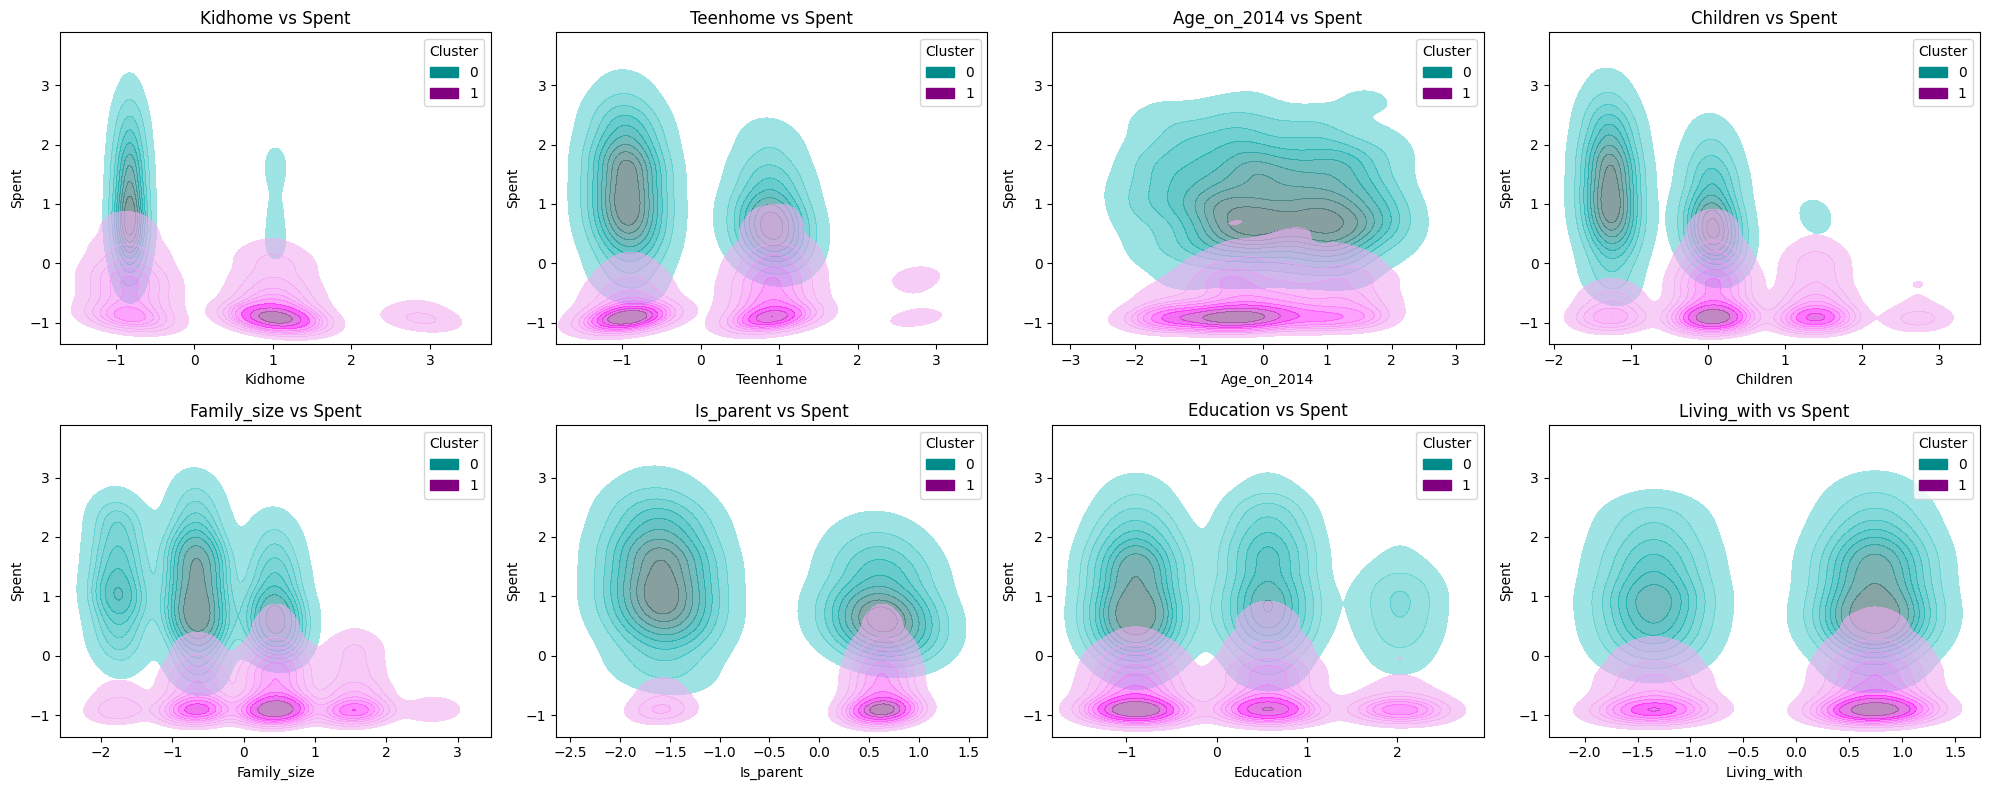

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Personal = ['Kidhome', 'Teenhome', 'Age_on_2014', 'Children',
            'Family_size', 'Is_parent', 'Education', 'Living_with']

# Crear figura
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.flatten()

# Graficar cada par variable vs Spent
for idx, var in enumerate(Personal):
    ax = axs[idx]
    sns.kdeplot(
        data=df,
        x=var,
        y='Spent',
        hue='Cluster',
        fill=True,
        common_norm=False,
        alpha=0.6,
        palette={0: 'darkcyan', 1: 'purple'},
        ax=ax
    )
    ax.set_title(f'{var} vs Spent')

plt.tight_layout()
plt.show()

### <font color="LightPink"><b>Relación entre variables demográficas y nivel de gasto</b></font>

El análisis conjunto entre las variables demográficas y el nivel de gasto (`Spent`) revela diferencias consistentes entre los clusters:

- El **cluster 0** (color verde) presenta una mayor concentración de gasto a lo largo de todas las variables, lo cual sugiere un perfil de consumidores con **mayor capacidad adquisitiva**.
- El **cluster 1** (color violeta) muestra una distribución más restringida en los niveles de gasto, asociada generalmente a valores más bajos en variables como `Income`, `Age_on_2014` y `Family_size`.

<br>

Observaciones:

- **Edad**: el cluster 0 agrupa personas mayores con mayor gasto; el cluster 1 incluye más jóvenes con menor gasto.
- **Tamaño del hogar (`Family_size`, `Children`, `Kidhome`, `Teenhome`)**: El cluster 1 parece vinculado a hogares con más hijos, pero con menos gasto, lo que podría reflejar restricciones presupuestales.

- **Condición parental (`Is_parent`)**: Las personas con hijos tienden a tener menor gasto en el cluster 1, mientras que en el cluster 0 se observa mayor gasto incluso en padres.

- **Nivel educativo (`Education`)** y **estado civil/convivencia (`Living_with`)**: No hay diferencias extremas, pero el cluster 0 tiende a mostrar mayor dispersión en los niveles de gasto.


En resumen, el perfil del cluster 0 refleja mayor capacidad de gasto y menor carga familiar.
